
# Experiment pefromed with CNN, KNN, SVM

In [4]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
def preprocess_image(image):
    # Apply Gaussian blur for noise removal
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply thresholding (OTSU's method)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    return thresholded


In [ ]:
# Preprocess the images
x_train = np.array([preprocess_image(img) for img in x_train])
x_test = np.array([preprocess_image(img) for img in x_test])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 63s 132ms/step - loss: 0.3711 - accuracy: 0.8871 - val_loss: 0.0845 - val_accuracy: 0.9725
Epoch 2/10
469/469 [==============================] - 56s 120ms/step - loss: 0.1269 - accuracy: 0.9629 - val_loss: 0.0571 - val_accuracy: 0.9808
Epoch 3/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0969 - accuracy: 0.9717 - val_loss: 0.0474 - val_accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0811 - accuracy: 0.9763 - val_loss: 0.0505 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0721 - accuracy: 0.9793 - val_loss: 0.0424 - val_accuracy: 0.9847
Epoch 6/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0602 - accuracy: 0.9823 - val_loss: 0.0413 - val_accuracy: 0.9862
Epoch 7/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0424 - val_ac

# SVM

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Image preprocessing function
def preprocess_image(image):
    # Apply Gaussian blur for noise removal
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply thresholding (OTSU's method)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    return thresholded




In [ ]:
# Feature extraction function using Local Binary Patterns (LBP)
def extract_features(image, num_points=24, radius=3):
    lbp = feature.local_binary_pattern(image, num_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    hist = hist.astype('float')
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram
    return hist

# Preprocess the images and extract features
x_train = np.array([extract_features(preprocess_image(img)) for img in x_train])
x_test = np.array([extract_features(preprocess_image(img)) for img in x_test])



In [ ]:
# Train an SVM classifier
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x_train, y_train)



SVC(C=1, kernel='linear')

In [ ]:
# Make predictions on the test dataset
y_pred = clf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.63%


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       980
           1       0.89      0.94      0.92      1135
           2       0.36      0.37      0.37      1032
           3       0.43      0.61      0.50      1010
           4       0.45      0.57      0.51       982
           5       0.49      0.07      0.12       892
           6       0.43      0.38      0.40       958
           7       0.59      0.54      0.56      1028
           8       0.56      0.64      0.60       974
           9       0.47      0.54      0.51      1009

    accuracy                           0.56     10000
   macro avg       0.56      0.55      0.53     10000
weighted avg       0.56      0.56      0.54     10000

Confusion Matrix:
[[ 775    1   36   26    2    1   92    4   40    3]
 [   0 1071    0    2    7    0   14   10   21   10]
 [  33    1  384  251  199   12   42   30   65   15]
 [   7    2  136  620   97   15   15   1

In [ ]:
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

error: ignored

ValueError: ignored

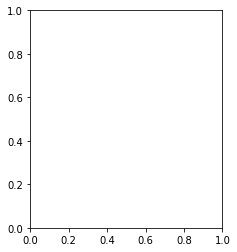

In [ ]:
import matplotlib.pyplot as plt
n_images = 5
plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()

Accuracy: 66.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       980
           1       0.94      0.97      0.96      1135
           2       0.46      0.42      0.44      1032
           3       0.49      0.64      0.55      1010
           4       0.64      0.82      0.72       982
           5       0.50      0.18      0.27       892
           6       0.64      0.61      0.62       958
           7       0.72      0.71      0.71      1028
           8       0.72      0.67      0.69       974
           9       0.53      0.61      0.57      1009

    accuracy                           0.66     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.66      0.66      0.65     10000

Confusion Matrix:
[[ 878    0    7    1    0    4   59    2    1   28]
 [   0 1104    1    0    9    0    1   19    0    1]
 [  12    0  438  221  141   72   42   30   40   36]
 [   0    0  188  643  

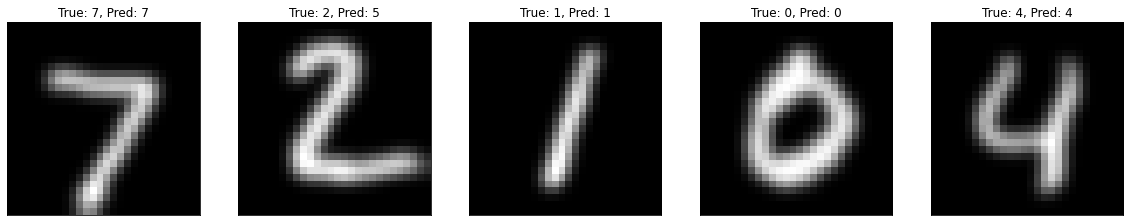

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_features(image, num_points=24, radius=3):
    lbp = feature.local_binary_pattern(image, num_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 5 images in the test dataset, their true labels, and predicted labels
n_images = 5

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()


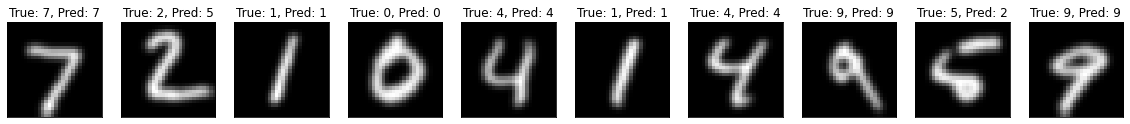

In [ ]:
# Visualize the first 5 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()

RBF kernel

In [ ]:
# Train an SVM classifier
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Accuracy: 71.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       980
           1       0.97      0.97      0.97      1135
           2       0.50      0.46      0.48      1032
           3       0.59      0.64      0.61      1010
           4       0.68      0.85      0.75       982
           5       0.56      0.43      0.49       892
           6       0.69      0.71      0.70       958
           7       0.76      0.73      0.75      1028
           8       0.75      0.75      0.75       974
           9       0.64      0.63      0.64      1009

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Confusion Matrix:
[[ 912    0    6    0    0    2   28    2    3   27]
 [   0 1106    1    0   10    0    1   17    0    0]
 [   3    0  476  156  121  136   38   27   55   20]
 [   0    0  173  645  

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.71


In [ ]:
# Train an SVM classifier
clf = svm.SVC(kernel='poly', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

Accuracy: 74.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       980
           1       0.97      0.98      0.97      1135
           2       0.52      0.51      0.51      1032
           3       0.65      0.67      0.66      1010
           4       0.72      0.85      0.78       982
           5       0.58      0.50      0.54       892
           6       0.71      0.76      0.74       958
           7       0.79      0.75      0.77      1028
           8       0.77      0.78      0.78       974
           9       0.71      0.65      0.68      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix:
[[ 943    0    3    0    0    3   14    0    4   13]
 [   0 1108    1    0    9    0    4   13    0    0]
 [   2    1  524  127   99  152   35   29   53   10]
 [   0    0  159  673  

In [ ]:
import numpy as np
import cv2
from skimage.feature import hog, local_binary_pattern
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt



# Calculate the F


In [ ]:
def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_hog_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    return features

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        descriptors = np.zeros((1, sift.descriptorSize()))
    return descriptors.ravel()

def extract_lbp_features(image):
    lbp = local_binary_pattern(image, P=8, R=1, method="uniform")
    hist, _ = np.histogram(lbp, bins=np.arange(0, 59), density=True)
    return hist



In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Choose the feature extraction method: 'hog', 'sift', or 'lbp'
feature_extraction_method = 'lbp'  # or 'sift' or 'lbp' or hog'

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

if feature_extraction_method == 'hog':
    x_train_features = np.array([extract_hog_features(img) for img in preprocessed_x_train])
    x_test_features = np.array([extract_hog_features(img) for img in preprocessed_x_test])
elif feature_extraction_method == 'sift':
    x_train_features = np.array([extract_sift_features(img) for img in preprocessed_x_train])
    x_test_features = np.array([extract_sift_features(img) for img in preprocessed_x_test])
elif feature_extraction_method == 'lbp':
    x_train_features = np.array([extract_lbp_features(img) for img in preprocessed_x_train])
    x_test_features = np.array([extract_lbp_features(img) for img in preprocessed_x_test])


In [ ]:

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],  # Only used when kernel is 'poly'
    'gamma': ['scale', 'auto']  # Only used when kernel is 'rbf' or 'poly'
}

# Create a base SVM classifier
base_clf = svm.SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(base_clf, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)



In [ ]:
# Train the SVM classifier using GridSearchCV to find the best parameters
grid_search.fit(x_train_features, y_train)

# Get the best estimator found by GridSearchCV
best_clf = grid_search.best_estimator_



Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
# Make predictions on the test dataset using the best estimator
y_pred = best_clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

NameError: ignored

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

kernel=linear, C=10, lbp

Accuracy: 72.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.97      0.97      0.97      1135
           2       0.51      0.47      0.49      1032
           3       0.60      0.65      0.62      1010
           4       0.69      0.85      0.76       982
           5       0.56      0.45      0.50       892
           6       0.70      0.73      0.71       958
           7       0.78      0.74      0.76      1028
           8       0.76      0.76      0.76       974
           9       0.66      0.63      0.64      1009

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix:
[[ 918    0    5    0    0    2   23    1    3   28]
 [   0 1105    1    0   10    0    1   18    0    0]
 [   7    0  481  151  117  144   37   24   55   16]
 [   0    0  167  653  

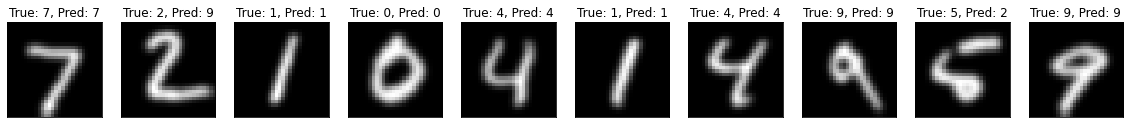

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_features(image, num_points=24, radius=3):
    lbp = feature.local_binary_pattern(image, num_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='linear', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




Accuracy: 74.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.53      0.50      0.52      1032
           3       0.65      0.66      0.66      1010
           4       0.71      0.86      0.78       982
           5       0.58      0.50      0.54       892
           6       0.72      0.75      0.73       958
           7       0.79      0.75      0.77      1028
           8       0.77      0.78      0.78       974
           9       0.69      0.65      0.67      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix:
[[ 941    0    1    0    0    2   15    1    4   16]
 [   0 1105    1    0   10    0    3   16    0    0]
 [   1    0  521  116  103  158   37   29   56   11]
 [   0    0  165  668  

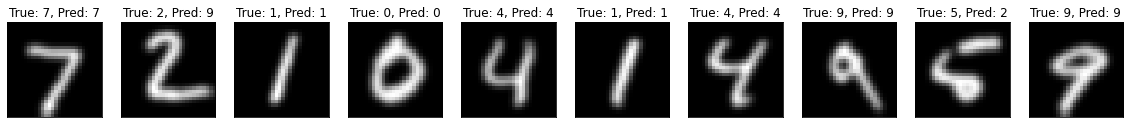

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_features(image, num_points=24, radius=3):
    lbp = feature.local_binary_pattern(image, num_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='rbf', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




# HOG

Accuracy: 74.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.53      0.50      0.52      1032
           3       0.65      0.66      0.66      1010
           4       0.71      0.86      0.78       982
           5       0.58      0.50      0.54       892
           6       0.72      0.75      0.73       958
           7       0.79      0.75      0.77      1028
           8       0.77      0.78      0.78       974
           9       0.69      0.65      0.67      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix:
[[ 941    0    1    0    0    2   15    1    4   16]
 [   0 1105    1    0   10    0    3   16    0    0]
 [   1    0  521  116  103  158   37   29   56   11]
 [   0    0  165  668  

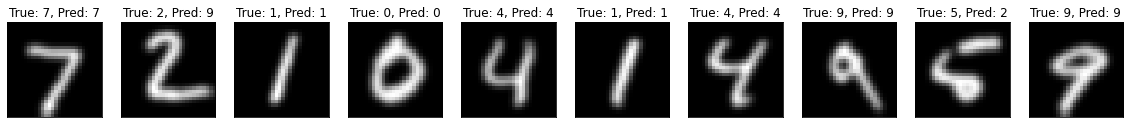

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_hog_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    return features

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='rbf', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




## kernel = linear

Accuracy: 72.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.97      0.97      0.97      1135
           2       0.51      0.47      0.49      1032
           3       0.60      0.65      0.62      1010
           4       0.69      0.85      0.76       982
           5       0.56      0.45      0.50       892
           6       0.70      0.73      0.71       958
           7       0.78      0.74      0.76      1028
           8       0.76      0.76      0.76       974
           9       0.66      0.63      0.64      1009

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix:
[[ 918    0    5    0    0    2   23    1    3   28]
 [   0 1105    1    0   10    0    1   18    0    0]
 [   7    0  481  151  117  144   37   24   55   16]
 [   0    0  167  653  

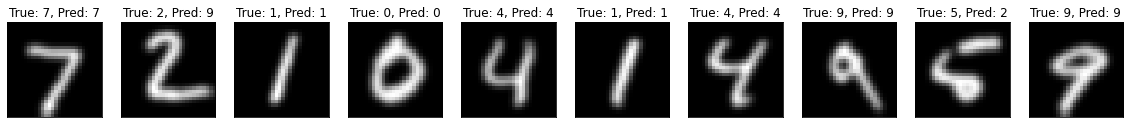

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_hog_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    return features

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='linear', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




## PolY

Accuracy: 74.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       980
           1       0.97      0.98      0.97      1135
           2       0.52      0.51      0.51      1032
           3       0.65      0.67      0.66      1010
           4       0.72      0.85      0.78       982
           5       0.58      0.50      0.54       892
           6       0.71      0.76      0.74       958
           7       0.79      0.75      0.77      1028
           8       0.77      0.78      0.78       974
           9       0.71      0.65      0.68      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix:
[[ 943    0    3    0    0    3   14    0    4   13]
 [   0 1108    1    0    9    0    4   13    0    0]
 [   2    1  524  127   99  152   35   29   53   10]
 [   0    0  159  673  

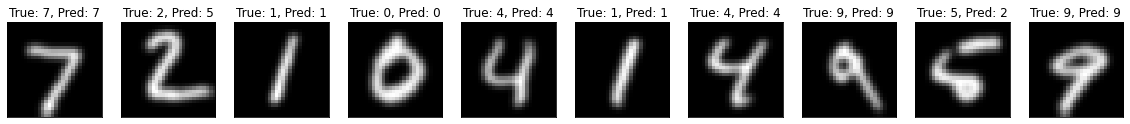

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_hog_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    return features

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='poly', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




Accuracy: 75.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.54      0.54      0.54      1032
           3       0.67      0.68      0.68      1010
           4       0.72      0.86      0.78       982
           5       0.59      0.54      0.56       892
           6       0.73      0.76      0.75       958
           7       0.83      0.75      0.79      1028
           8       0.80      0.79      0.80       974
           9       0.71      0.66      0.68      1009

    accuracy                           0.76     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix:
[[ 950    0    3    0    0    2    7    0    3   15]
 [   0 1112    1    0    9    0    4    9    0    0]
 [   2    2  553  112   95  148   32   21   53   14]
 [   0    0  148  684  

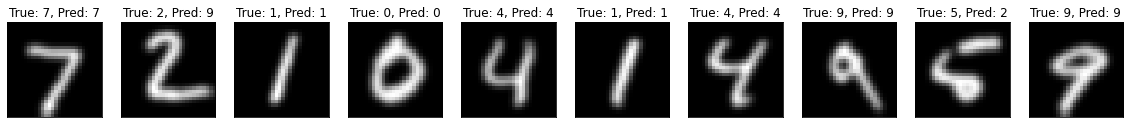

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_hog_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    return features

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='poly', C=100)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




## **SIFT**

Accuracy: 75.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.54      0.54      0.54      1032
           3       0.67      0.68      0.68      1010
           4       0.72      0.86      0.78       982
           5       0.59      0.54      0.56       892
           6       0.73      0.76      0.75       958
           7       0.83      0.75      0.79      1028
           8       0.80      0.79      0.80       974
           9       0.71      0.66      0.68      1009

    accuracy                           0.76     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix:
[[ 950    0    3    0    0    2    7    0    3   15]
 [   0 1112    1    0    9    0    4    9    0    0]
 [   2    2  553  112   95  148   32   21   53   14]
 [   0    0  148  684  

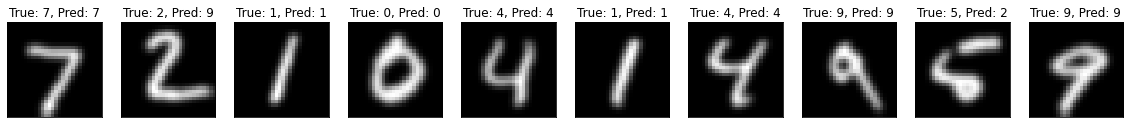

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        descriptors = np.zeros((1, sift.descriptorSize()))
    return descriptors.ravel()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='poly', C=100)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




Accuracy: 72.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.97      0.97      0.97      1135
           2       0.51      0.47      0.49      1032
           3       0.60      0.65      0.62      1010
           4       0.69      0.85      0.76       982
           5       0.56      0.45      0.50       892
           6       0.70      0.73      0.71       958
           7       0.78      0.74      0.76      1028
           8       0.76      0.76      0.76       974
           9       0.66      0.63      0.64      1009

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix:
[[ 918    0    5    0    0    2   23    1    3   28]
 [   0 1105    1    0   10    0    1   18    0    0]
 [   7    0  481  151  117  144   37   24   55   16]
 [   0    0  167  653  

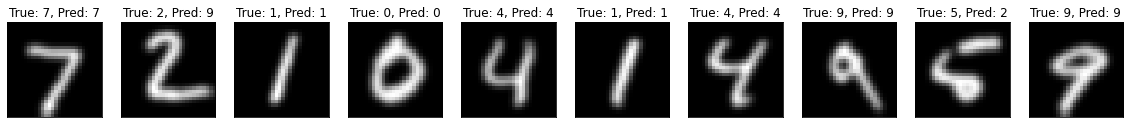

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        descriptors = np.zeros((1, sift.descriptorSize()))
    return descriptors.ravel()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='linear', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




RBF

Accuracy: 74.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.53      0.50      0.52      1032
           3       0.65      0.66      0.66      1010
           4       0.71      0.86      0.78       982
           5       0.58      0.50      0.54       892
           6       0.72      0.75      0.73       958
           7       0.79      0.75      0.77      1028
           8       0.77      0.78      0.78       974
           9       0.69      0.65      0.67      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix:
[[ 941    0    1    0    0    2   15    1    4   16]
 [   0 1105    1    0   10    0    3   16    0    0]
 [   1    0  521  116  103  158   37   29   56   11]
 [   0    0  165  668  

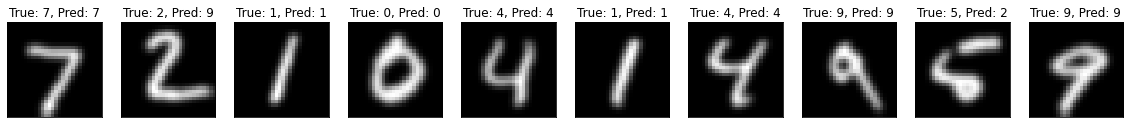

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        descriptors = np.zeros((1, sift.descriptorSize()))
    return descriptors.ravel()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='rbf', C=10)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




Accuracy: 73.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       980
           1       0.97      0.97      0.97      1135
           2       0.52      0.48      0.50      1032
           3       0.62      0.65      0.64      1010
           4       0.70      0.85      0.77       982
           5       0.57      0.47      0.51       892
           6       0.70      0.73      0.72       958
           7       0.78      0.74      0.76      1028
           8       0.76      0.77      0.76       974
           9       0.67      0.64      0.66      1009

    accuracy                           0.73     10000
   macro avg       0.72      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
[[ 927    0    3    0    0    2   17    1    5   25]
 [   0 1103    1    0   10    0    3   18    0    0]
 [   4    0  500  137  108  148   38   28   57   12]
 [   0    0  163  659  

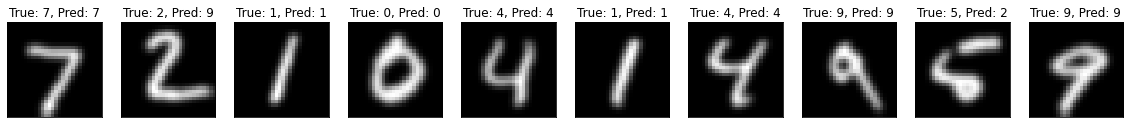

In [ ]:
import numpy as np
import cv2
from skimage import feature
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def preprocess_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        descriptors = np.zeros((1, sift.descriptorSize()))
    return descriptors.ravel()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the images and extract features
preprocessed_x_train = np.array([preprocess_image(img) for img in x_train])
preprocessed_x_test = np.array([preprocess_image(img) for img in x_test])

x_train_features = np.array([extract_features(img) for img in preprocessed_x_train])
x_test_features = np.array([extract_features(img) for img in preprocessed_x_test])

# Train an SVM classifier
clf = svm.SVC(kernel='rbf', C=10, gamma=1)
clf.fit(x_train_features, y_train)

# Make predictions on the test dataset
y_pred = clf.predict(x_test_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
n_images = 10

plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Display the original image
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(preprocessed_x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}", fontsize=12)

plt.show()




KNN

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

# Scale the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


11490434/11490434 [==============================] - 0s 0us/step
Accuracy: 96.88%


In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)




Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    

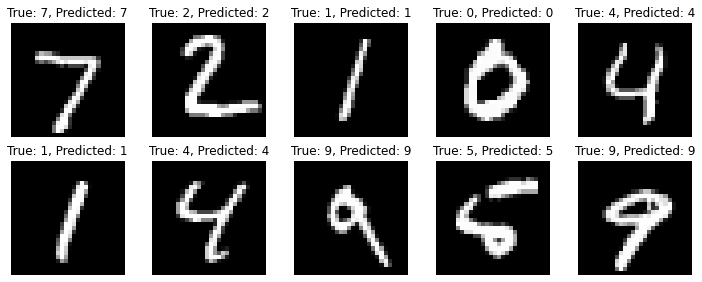

In [6]:
import matplotlib.pyplot as plt


# Visualize the first 10 images in the test dataset, their true labels, and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Predicted: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [3]:
import joblib

# Save the KNN model
joblib.dump(knn, 'knn_model.joblib')


['knn_model.joblib']

In [ ]:
#TO use any new image for prediction 
import numpy as np
import joblib
from PIL import Image

# Load the saved KNN model
knn = joblib.load('knn_model.joblib')

# Load the new image and preprocess it
new_image = Image.open('new_image.jpg').convert('L')  # convert to grayscale
new_image = new_image.resize((28, 28))  # resize to 28x28
new_image = np.array(new_image).reshape(1, -1)  # flatten to a 784-dimensional vector
new_image = new_image.astype('float32') / 255  # scale pixel values to [0, 1]

# Use the KNN model to make a prediction
new_image_pred = knn.predict(new_image)

print(f"Prediction: {new_image_pred}")